In [6]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
%matplotlib inline

In [3]:
file_path = "../data/songData/genres/blues/blues.00000.wav"
y, sr = librosa.load(file_path)

In [4]:
S_full, phase = librosa.magphase(librosa.stft(y))

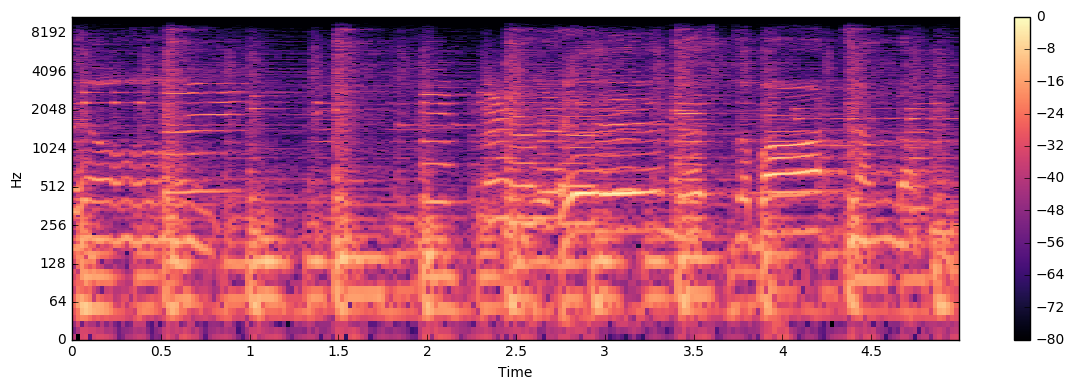

In [9]:
idx = slice(*librosa.time_to_frames([5, 10], sr=sr))
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.amplitude_to_db(S_full[:, idx], ref=np.max),
                        x_axis='time', y_axis='log', sr=sr)
plt.colorbar()
plt.tight_layout()

In [11]:
S_filter = librosa.decompose.nn_filter(S_full,
                                      aggregate=np.median,
                                      metric='cosine',
                                      width=int(librosa.time_to_frames(2, sr)))

In [12]:
S_filter = np.minimum(S_filter, S_full)